In [1]:

from sklearn import mixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from comp_analysis_cluster import read_rrng
import os
from mpl_toolkits import mplot3d
from scipy import stats
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import norm
import  pandas as pd
from tqdm import tqdm
import h5py
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import homogeneity_score
import plotly.graph_objects as go
import numpy as np


from comp_analysis_cluster import centeroid_df, centeroid_np_array, PCA_cumsum, NumClusters, VoxRead, CompositionCluster,SaveCompositionClusters


In [2]:
Small_chunk_file_name = "file_file_D1 High Hc R5076_52126_apt_large_chunks_test_arr_h5_small_chunks_test_arr4.h5"
Vox_centroid_file_to_make_name = "3_Vox_centroids_D3_Mr_Grp.h5"
Vox_ratio_file_name="3Vox_ratios_filenames_num_MR_Grp.h5"

In [3]:
PCACumsumArr, Ratios = PCA_cumsum(VoxRatioFile=Vox_ratio_file_name, VoxFile =Small_chunk_file_name)

In [4]:
NumClustersVal, AIC, BIC =  NumClusters(VoxRatioFile=Vox_ratio_file_name, VoxFile =Small_chunk_file_name, NumClustersVal=10 )

100%|██████████| 9/9 [00:34<00:00,  3.79s/it]


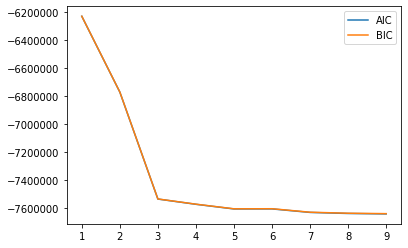

In [5]:
NumCLusterLst = list(range(1,NumClustersVal))
plt.plot(NumCLusterLst, AIC, label="AIC")
plt.plot(NumCLusterLst, BIC, label="BIC")
plt.legend()

In [6]:
SaveCompositionClusters(VoxRatioFile=Vox_ratio_file_name, VoxFile =Small_chunk_file_name, OutFile =Vox_centroid_file_to_make_name,n_components = 10)

100%|██████████| 23144/23144 [00:33<00:00, 693.41it/s] 


In [82]:

with h5py.File(Vox_centroid_file_to_make_name , "r") as hdfr:
    Phase2_cent_arr = np.array(hdfr.get("Phase1/Phase1_centroids"))
    group2 = hdfr.get("Phase1")
    Phase2_cent_columns = list(list(group2.attrs.values())[0])
    #Group_name = list(list(hdfr.attrs.values())[1])
Phase2_cent =pd.DataFrame(data=Phase2_cent_arr, columns=Phase2_cent_columns)
Phase2_cent.head()
len(Phase2_cent)

42167

In [83]:
from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK#, pointsToVTKAsTIN

Df_comb = Phase2_cent
image = Df_comb.values
FILE_PATH1 = "./Ph1_raw_cent_D1"
x = np.ascontiguousarray(image[:,0])
y= np.ascontiguousarray(image[:,1])
z = np.ascontiguousarray(image[:,2])
label = np.ascontiguousarray( image[:,3])
pointsToVTK(FILE_PATH1,x,y,z, data = {"label" : label}  )

'/talos/u/gazal/APT_calculations/for_nikita_Sm_Zr_Cu_Fe/20220613_APT_NFDI/Ph1_raw_cent_D1.vtu'

In [ ]:
####################################